# Multiple tube generation experiment processing

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns

In [3]:
datapath = "~/teigen_data/output_rows.csv"

In [4]:
plotkw ={
    "figsize": [9, 6], 
    "fontsize": 14, 
}
plot_title_size = 40
plot_linewidth = 3

plot_boxprops = {
    "linewidth": plot_linewidth
}
boxplotkw = {
    "figsize": [9, 6], 
    "fontsize": 14, 
    "boxprops": plot_boxprops,
    "medianprops": plot_boxprops,
    "whiskerprops": plot_boxprops,
    "capprops": plot_boxprops,
    
}

In [5]:
available_radius_methods = [
    "inscribed", "circumscribed", 
    "average",
    "cylinder volume", 
    "cylinder volume + sphere error",
    "cylinder volume + sphere error + man",
    "cylinder volume + sphere error + join error",
    "cylinder surface", 
    "cylinder surface + sphere error",
    "cylinder surface + sphere error + join error",
    "cylinder surface + sphere error + join error man",
    "best",
    
]

Populating the interactive namespace from numpy and matplotlib


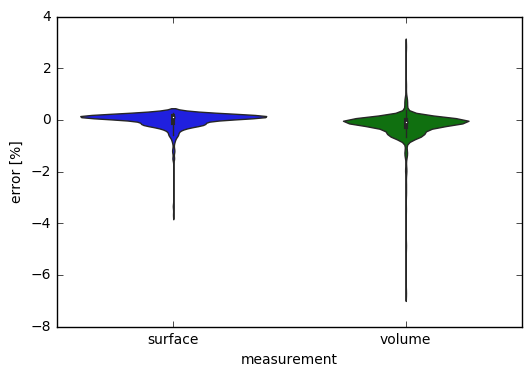

64/892


In [6]:
%run evaltools.ipynb

In [7]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())

# df

Index([u'config appearance force_rewrite', u'config appearance noise_preview',
       u'config appearance show_aposteriori_surface',
       u'config appearance skip_volume_generation',
       u'config appearance surface_3d_preview',
       u'config areasampling areasize_mm', u'config areasampling areasize_px',
       u'config areasampling voxelsize_mm', u'config filepattern',
       u'config filepattern_abspath', u'config filepattern_series_number',
       u'config generator_id',
       u'config generators Continuous tubes element_number',
       u'config generators Continuous tubes radius_distribution_fixed',
       u'config generators Continuous tubes radius_distribution_maximum',
       u'config generators Continuous tubes radius_distribution_mean',
       u'config generators Continuous tubes radius_distribution_minimum',
       u'config generators Continuous tubes radius_distribution_normal',
       u'config generators Continuous tubes radius_distribution_standard_deviation',
     

In [8]:
#pd.to_datetime(str(datetime.datetime.now()))

In [9]:
# pd.to_datetime(df[step2_datetime_key]) > pd.to_datetime("2017-07-05")

In [10]:
df =read_data(datapath)

In [11]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
# df["length_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]

# Numeric measurement precision (element_numer = 20, length_mean = 15)

In [12]:
dfs = df[
    df[note_key] == "resolution sphere"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot(x="measurement_resolution", **plotkw)
dfsp

,surface error [%],volume error [%],measurement_resolution


In [13]:
#sns.factorplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

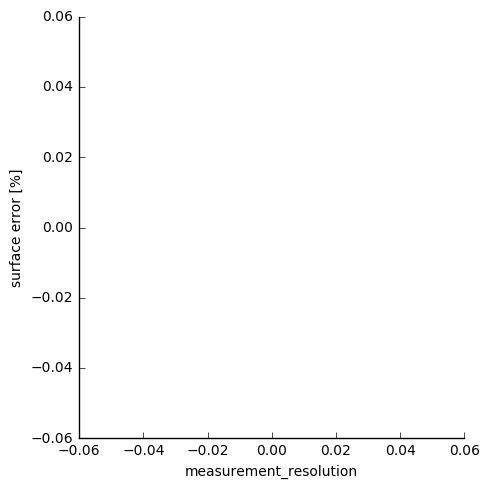

In [14]:
sns.lmplot("measurement_resolution", "surface error [%]", data=dfs)#.set(ylim=(0, 1))

In [15]:
dfs = df[
    df[note_key] == "resolution tube"
    
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)
# dfsp

In [16]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df[note_key] == "tube length"
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "length_distribution_mean"]].sort_values(
    "length_distribution_mean")
if len(dfsp) > 0:
    dfsp.plot( x="measurement_resolution", **plotkw)

In [17]:
import seaborn as sns

In [18]:
pd.__path__

['/home/mjirik/miniconda2/lib/python2.7/site-packages/pandas']

In [19]:
pd.__version__

u'0.20.3'

In [20]:
## element_number = 10, 
np.unique(df[note_key])

array(['compensation method 5 tubes cylinder surface + sphere error',
       'compensation method 5 tubes cylinder surface + sphere error + join error',
       'compensation method 5 tubes cylinder volume + sphere error',
       'element number cylinder volume + sphere error',
       'element number inscribed',
       'generated volume element_number anisotropic inscribed',
       'generated volume isotropy inscribed',
       'generated volume length inscribed',
       'generated volume noise inscribed',
       'generated volume radius inscribed',
       'generated volume resolution_mm inscribed',
       'mix 2 cylinder surface + sphere error',
       'mix 2 cylinder surface + sphere error + join error',
       'mix 2 cylinder volume + sphere error',
       'mix 2 cylinder volume + sphere error + join error'], dtype=object)

In [21]:
display("<b>ahoj<b>")

'<b>ahoj<b>'

## Compensation methods

### 1 sphere

In [22]:
evaluate_based_on_note(df, "compensation method 1 sphere ")

In [23]:
evaluate_based_on_note(df, "compensation method 1 sphere " )
# for radius_method in ["inscribed", "circumscribed", "cylinder surface", "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
#     dfs = df[
#         df[note_key] == "compensation method 1 sphere " + radius_method
#         # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
#     ]
    #print dfs.keys()
    #display(dfs[["surface [mm^2]", "numeric surface [mm^2]"]])
#     show_error(dfs, radius_method=radius_method, plotkw=plotkw)

### 1 tube

In [24]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df[note_key] == "compensation method 1 tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    show_error(dfs, radius_method=radius_method)
    # dfplot(dfs, plotkw, radius_method)

## N tubes

In [25]:
for radius_method in available_radius_methods:
        
    dfs = df[
        df[note_key] == "compensation method N tube " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    dfsp = show_error(dfs, radius_method=radius_method)

## 5 tubes

/home/mjirik/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mjirik/miniconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/mjirik/miniconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/mjirik/miniconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


 18 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 



/home/mjirik/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


 18 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 

 18 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 



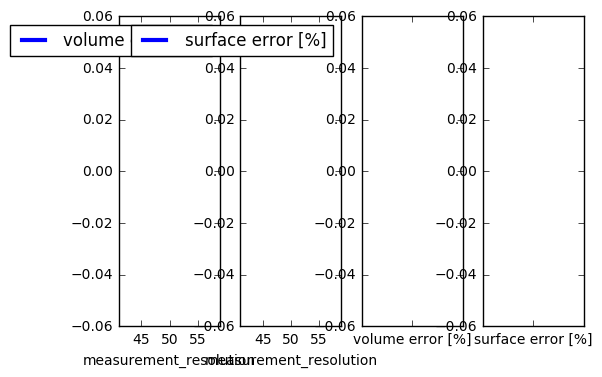

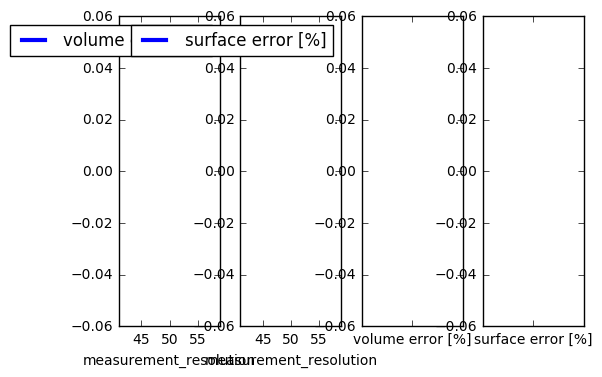

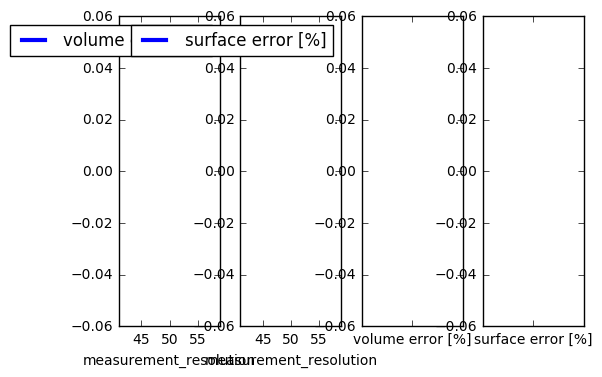

In [26]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] ==  "compensation method 5 tubes " + radius_method
    ]
    dfsp = show_error(dfs)

In [27]:
for radius_method in ["inscribed", "circumscribed", "cylinder surface", 
                      "cylinder volume", "average", "cylinder volume + sphere compensation"]:
        
    dfs = df[
        df[note_key] == "compensation method " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    
    show_error(dfs, radius_method=radius_method)
#     dfplot(dfs, plotkw, radius_method)

### Mix 

In [28]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] ==  "mix " + radius_method
    ]
    dfsp = show_error(dfs, radius_method=radius_method)

cylinder volume + sphere error 168 :
volume (w/s): 
WilcoxonResult(statistic=943.0, pvalue=1.8769245772953387e-22) 
SpearmanrResult(correlation=0.99842313247447434, pvalue=1.4654456827305898e-209) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=2.5427106966906604e-29) 
SpearmanrResult(correlation=0.99672967172999538, pvalue=2.6928928196727463e-183) 

cylinder volume + sphere error + join error 166 :
volume (w/s): 
WilcoxonResult(statistic=856.0, pvalue=1.1874609290155533e-22) 
SpearmanrResult(correlation=0.99845014323929504, pvalue=1.1357474490936977e-207) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=5.4144808742921285e-29) 
SpearmanrResult(correlation=0.9969365297532623, pvalue=1.9704372674725275e-183) 

cylinder surface + sphere error 170 :
volume (w/s): 
WilcoxonResult(statistic=3353.0, pvalue=1.1221736136346078e-09) 
SpearmanrResult(correlation=0.97031943709905755, pvalue=1.6994288086116391e-105) 
surface (w/s): 
WilcoxonResult(statistic=3240.0, pvalue=3.685082299926

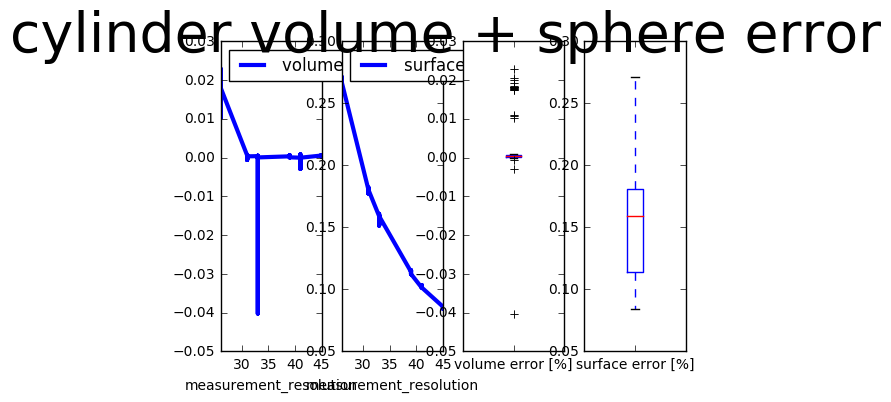

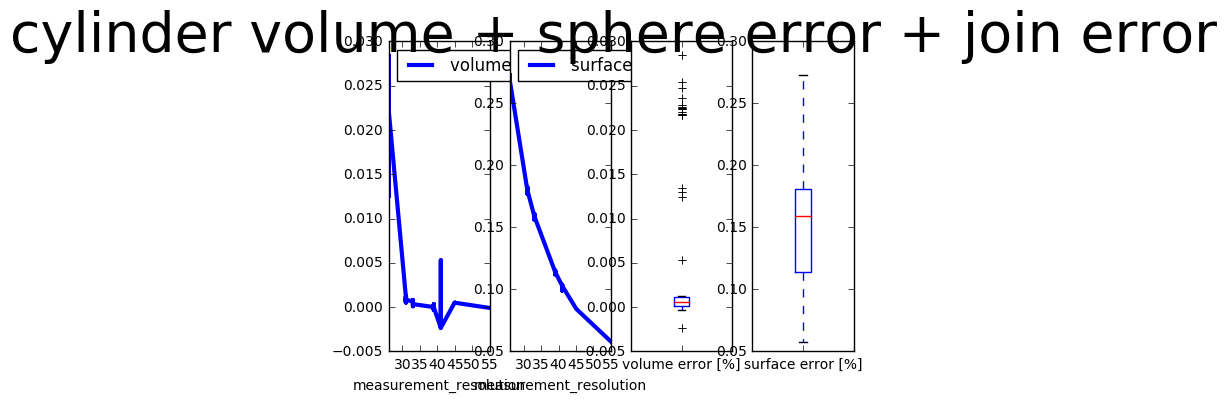

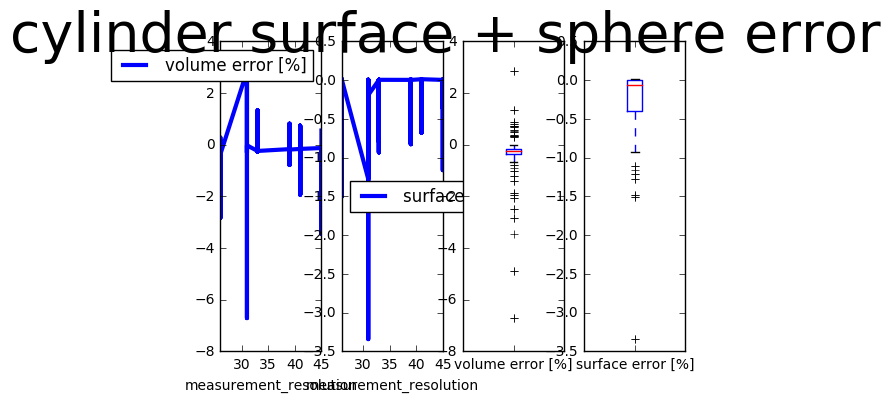

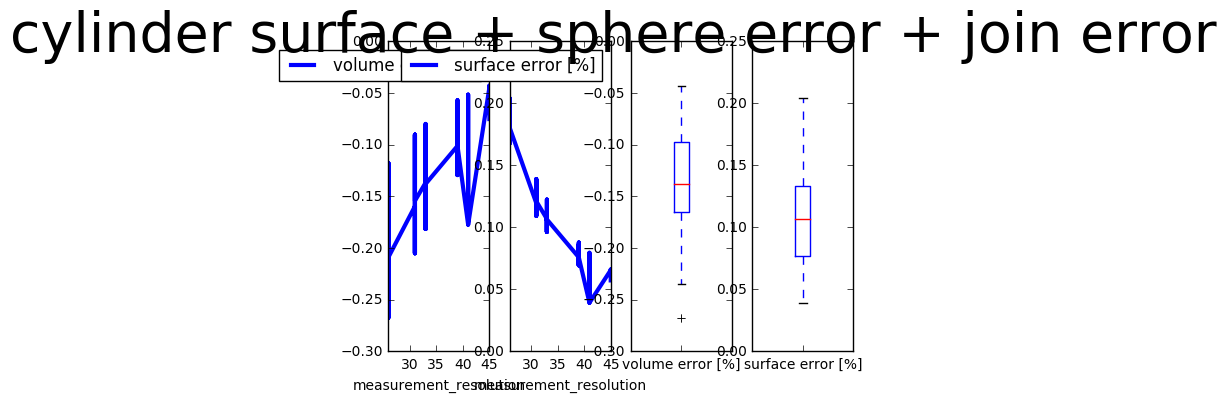

In [29]:

evaluate_based_on_note(df, "mix 2 ")

cylinder volume + sphere error 168 :
volume (w/s): 
WilcoxonResult(statistic=943.0, pvalue=1.8769245772953387e-22) 
SpearmanrResult(correlation=0.99842313247447434, pvalue=1.4654456827305898e-209) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=2.5427106966906604e-29) 
SpearmanrResult(correlation=0.99672967172999538, pvalue=2.6928928196727463e-183) 

cylinder volume + sphere error + join error 166 :
volume (w/s): 
WilcoxonResult(statistic=856.0, pvalue=1.1874609290155533e-22) 
SpearmanrResult(correlation=0.99845014323929504, pvalue=1.1357474490936977e-207) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=5.4144808742921285e-29) 
SpearmanrResult(correlation=0.9969365297532623, pvalue=1.9704372674725275e-183) 

cylinder surface + sphere error 170 :
volume (w/s): 
WilcoxonResult(statistic=3353.0, pvalue=1.1221736136346078e-09) 
SpearmanrResult(correlation=0.97031943709905755, pvalue=1.6994288086116391e-105) 
surface (w/s): 
WilcoxonResult(statistic=3240.0, pvalue=3.685082299926

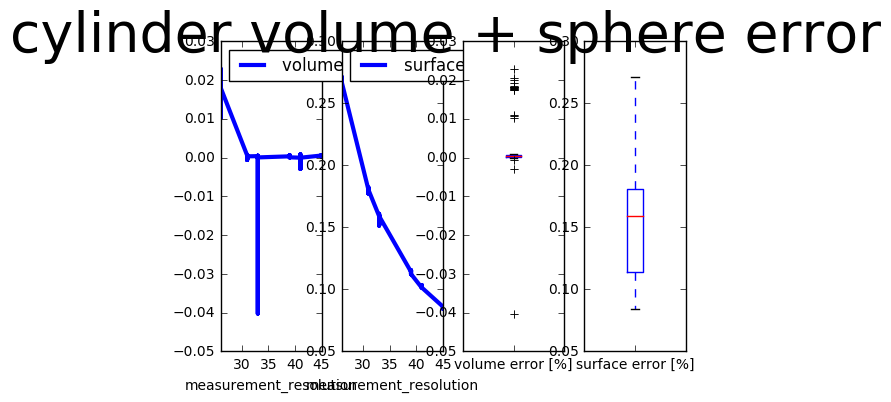

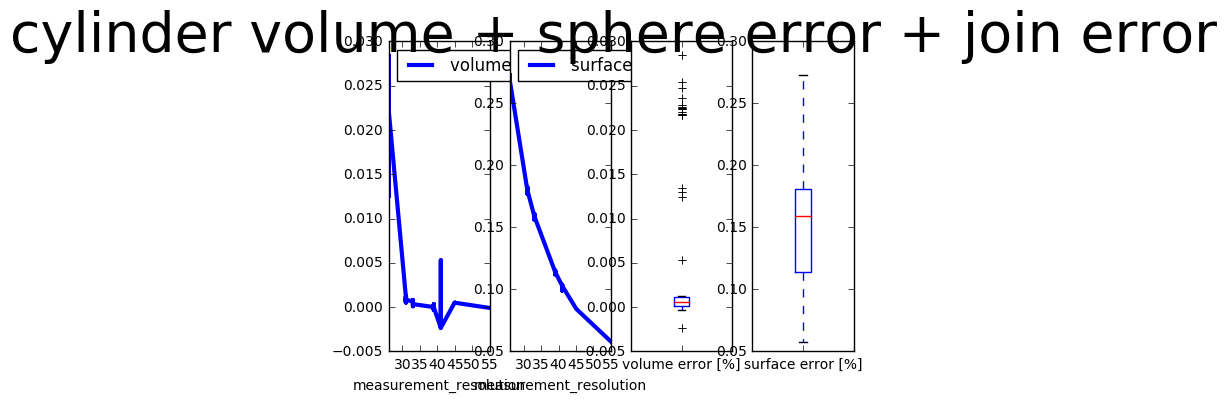

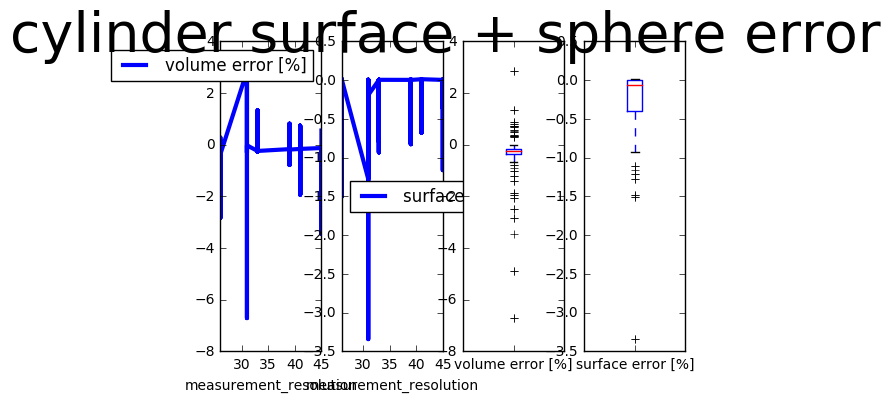

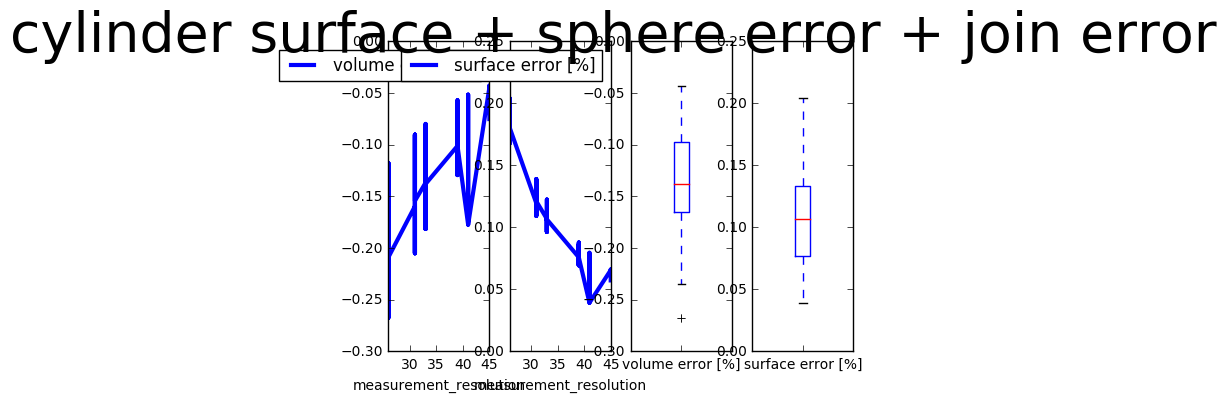

In [30]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] ==  "mix 2 " + radius_method
    ]
    dfsp = show_error(dfs, radius_method=radius_method, plotkw=plotkw)

### Radius estimation

In [31]:
dfs[["volume [mm^3]"]]

,volume [mm^3]


In [32]:
### Kontrolní výpočet objemu

In [33]:
v_sphere = (4.0/3.0) * np.pi * 20.0**3
v_sphere

33510.32163829113

In [34]:
v_cylinder = np.pi*20.0**2 * 2.6696777
v_cylinder

3354.815939908998

In [35]:
v_cylinder + v_sphere

36865.13757820013


# Numeric and analytic error

## measurement_resolution = 25

In [36]:
# df = pd.read_csv(op.expanduser(datapath))
# df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
# df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
# df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
# df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
# df["measurement_resolution"] = df["postprocessing measurement_resolution"]
# df["element_number"] = df["generators Unconnected tubes element_number"]
# df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
# df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df[note_key] == "compensation method 5 tubes " + "best"
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]


In [37]:
if len(dfsp) > 0:
    axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [38]:
if len(dfsp) > 0:
    axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

In [39]:
if len(dfsp) > 0:
    axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

cylinder volume + sphere error 18 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 

cylinder surface + sphere error 18 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 

cylinder surface + sphere error + join error 18 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=0.00019643672621231134) 
SpearmanrResult(correlation=nan, pvalue=nan) 



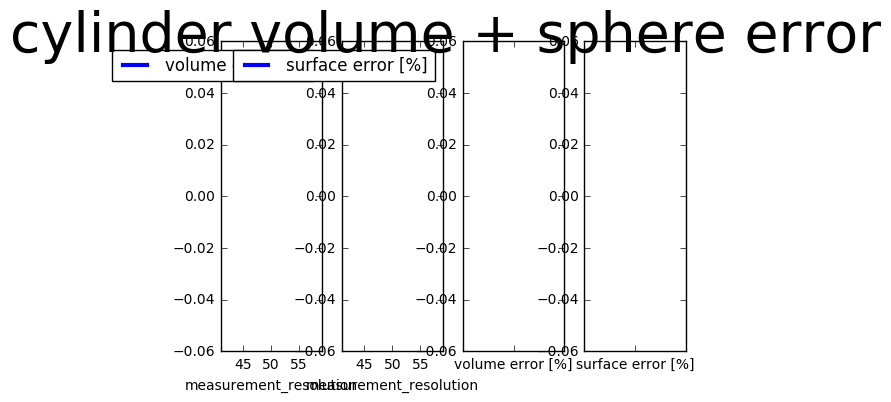

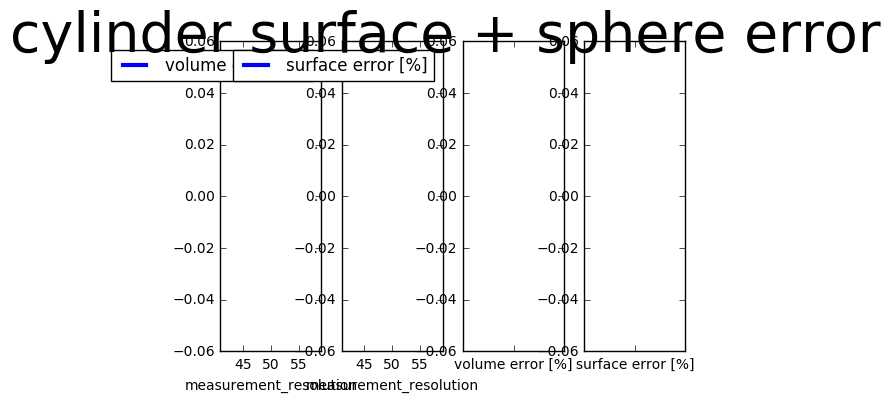

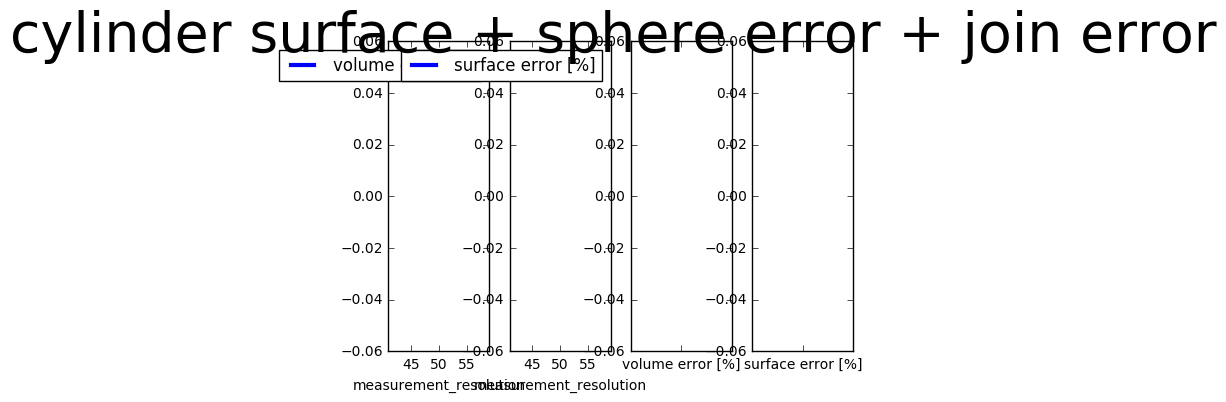

In [40]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in available_radius_methods:
# ["cylinder surface", "cylinder volume", "cylinder volume + sphere compensation", "best"]:

        
    dfs = df[
        df[note_key] == "compensation method 5 tubes " + radius_method
    ]
    
    show_error(dfs, radius_method=radius_method)
    dfs
#     dfplot(dfs, plotkw, radius_method

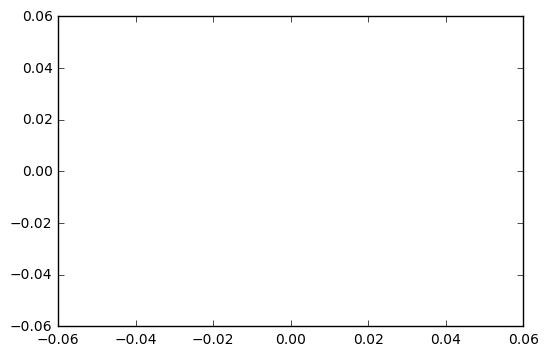

In [41]:
nsu = dfsp["numeric surface [mm^2]"]
su = dfsp["surface [mm^2]"]
nsux = np.ones([len(nsu)])
sux = np.zeros([len(su)])
y = np.concatenate([nsu, su])
x = np.concatenate([nsux,sux])
#plot(, np.concatenate([nsux,sux]))
plt.plot(x, y)

In [42]:
y.shape

(0,)

In [43]:
x.shape

(0,)

In [44]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%]
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


# Statistics

In [45]:
# for radius_method in ["cylinder volume + sphere compensation"]:
for radius_method in [
    "inscribed", 
    # "circumscribed", "cylinder surface", "cylinder volume",
    "average", 
    "cylinder volume + sphere compensation", 
    
    "best"]:

        
    dfs = df[
        df[note_key] == "fixed resolution " + radius_method
    ]
    
    dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
        "measurement_resolution")
    
    dfplot(dfs, plotkw, radius_method)

In [46]:
dfs

,config appearance force_rewrite,config appearance noise_preview,config appearance show_aposteriori_surface,config appearance skip_volume_generation,config appearance surface_3d_preview,config areasampling areasize_mm,config areasampling areasize_px,config areasampling voxelsize_mm,config filepattern,config filepattern_abspath,...,numeric surface [mm^2],surface error [mm^2],surface error [%],volume error [mm^3],volume error [%],measurement_resolution,length_distribution_mean,radius_distribution_mean,element_number,element number


## Surface

In [47]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["surface [mm^2]"], y=dfs["numeric surface [mm^2]"], correction=False, zero_method="pratt")

/home/mjirik/miniconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/home/mjirik/miniconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se


WilcoxonResult(statistic=0.0, pvalue=nan)

In [48]:
scipy.stats.wilcoxon(dfs["surface error [%]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [49]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["surface [mm^2]"], dfs["numeric surface [mm^2]"])

SpearmanrResult(correlation=nan, pvalue=nan)

## Volume

In [50]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfs["volume [mm^3]"], y=dfs["numeric volume [mm^3]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=nan)

In [51]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfs["volume [mm^3]"], dfs["numeric volume [mm^3]"])

SpearmanrResult(correlation=nan, pvalue=nan)

# Inscribed to circum

In [52]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out

11.547005383792515

In [53]:
np.cos(np.pi/2)

6.123233995736766e-17

In [54]:
np.concatenate([np.random.rand(10,10) * 120, np.ones([10,10])*99])

array([[ 113.33965722,  112.81718893,   18.6717379 ,   98.05372967,
           6.67020821,   42.65087098,   85.93111118,   89.46955705,
          99.36927713,  112.24092128],
       [ 101.59641697,    3.71139324,   58.72137316,   94.57751986,
          77.87024583,   46.18229303,  114.4954678 ,   16.02029157,
          55.09009016,   69.59492387],
       [ 113.04614116,    4.4234764 ,    5.62322076,  113.44358413,
          97.40752526,   43.15697602,  115.96175157,   91.00344387,
         102.24638245,   34.89891707],
       [  45.19760271,  108.76813574,    9.13253714,   45.66078259,
         105.15887286,   12.27941889,   41.99228847,   50.80193714,
          71.93438165,   68.91665489],
       [  27.62870517,   86.58764804,   39.741375  ,   65.61480957,
          10.62088423,  116.9475271 ,   62.13865674,  119.50470308,
         105.80762453,    6.49659737],
       [  99.88887098,   29.12948405,   29.39645793,   85.93367831,
         104.39172643,    7.51913372,   57.47221163,   40